<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Linear_Regression_pada_Linnerud_builtin_sklearn_target_Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Prediksi Weight dari fitur latihan (Chins, Situps, Jumps)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
data = load_linnerud()
X = data.data                           # fitur: Chins, Situps, Jumps
y = data.target[:, 0]                   # target: Weight
feature_names = data.feature_names
target_name = data.target_names[0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [3]:
coefs = pipe.named_steps["lr"].coef_
print(f"Target: {target_name}")
print(f"R^2 Test: {r2_score(y_test, y_pred):.3f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_pred):.3f}")
print("Koefisien:", dict(zip(feature_names, np.round(coefs, 3))))

Target: Weight
R^2 Test: -2.227
MAE Test: 24.404
Koefisien: {'Chins': np.float64(1.727), 'Situps': np.float64(-23.33), 'Jumps': np.float64(8.946)}


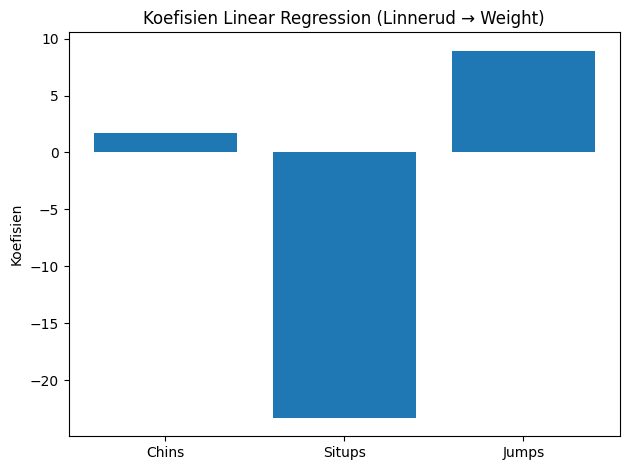

In [4]:
# Grafik 1 — Koefisien (bar)
plt.figure()
plt.bar(feature_names, coefs)
plt.ylabel("Koefisien")
plt.title("Koefisien Linear Regression (Linnerud → Weight)")
plt.tight_layout()
plt.show()

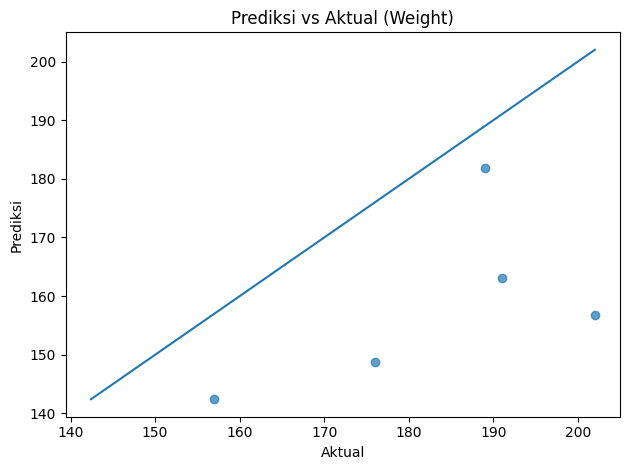

In [5]:
# Grafik 2 — Prediksi vs Aktual
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7)
m, M = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([m, M], [m, M])
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Prediksi vs Aktual (Weight)")
plt.tight_layout()
plt.show()